<a href="https://colab.research.google.com/github/itimes-digital/deep-learning-estudo/blob/main/prediction/stock_predict_bkbr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/itimes-digital/deep-learning-estudo/main/dataset/BKBR3.SA.csv')
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,17.950001,17.950001,17.170000,17.350000,17.289284,918500.0
1,2020-01-03,17.040001,17.320000,16.900000,17.049999,16.990332,869200.0
2,2020-01-06,17.320000,17.389999,16.690001,17.230000,17.169703,672700.0
3,2020-01-07,17.400000,17.530001,16.980000,17.340000,17.279318,611800.0
4,2020-01-08,17.570000,17.570000,17.110001,17.230000,17.169703,926300.0


In [9]:
print('Média Open {0}'.format(dataset['Open'].mean()))
print('Média High {0}'.format(dataset['High'].mean()))
print('Média Low {0}'.format(dataset['Low'].mean()))
print('Média Close {0}'.format(dataset['Close'].mean()))
print('Média Volume {0}'.format(dataset['Volume'].mean()))

Média Open 11.8475799041096
Média High 12.164566173515988
Média Low 11.463926931506855
Média Close 11.812831054794518
Média Volume 1819530.1369863013


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       220 non-null    object 
 1   Open       219 non-null    float64
 2   High       219 non-null    float64
 3   Low        219 non-null    float64
 4   Close      219 non-null    float64
 5   Adj Close  219 non-null    float64
 6   Volume     219 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.2+ KB


In [11]:
dataset = dataset.dropna()

In [31]:
dataset_previsor = dataset.iloc[0:208, 0:8]
dataset_previsor.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
204,2020-10-26,11.00,11.07,10.57,10.58,10.58,1135200.0
205,2020-10-27,10.65,10.71,10.51,10.54,10.54,1770700.0
206,2020-10-28,10.39,10.39,10.04,10.12,10.12,1398500.0
207,2020-10-29,10.11,10.18,9.60,9.99,9.99,2065600.0
208,2020-10-30,9.99,10.05,9.61,9.74,9.74,1813100.0


In [32]:
dataset_previsor.describe()

,Open,High,Low,Close,Adj Close,Volume
count,208.000000,208.000000,208.000000,208.000000,208.000000,2.080000e+02
mean,11.895625,12.212837,11.506010,11.854327,11.842865,1.800217e+06
std,2.898654,2.850157,2.875003,2.863271,2.842167,9.741304e+05
min,6.500000,8.120000,6.040000,6.850000,6.850000,4.243000e+05
25%,10.255000,10.545000,9.897500,10.117500,10.117500,1.125950e+06
50%,11.090000,11.430000,10.850000,11.090000,11.090000,1.540250e+06
75%,12.342500,12.787500,11.835000,12.385000,12.385000,2.244575e+06
max,19.469999,19.799999,19.100000,19.450001,19.381935,6.323400e+06


In [30]:
dataset_futuro = dataset.iloc[208:219, 0:8]
dataset_futuro.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
209,2020-11-03,9.91,10.04,9.55,9.65,9.65,2417900.0
210,2020-11-04,9.85,10.28,9.80,10.22,10.22,1110500.0
211,2020-11-05,10.38,10.53,10.16,10.41,10.41,1009800.0
212,2020-11-06,10.17,10.85,9.95,10.71,10.71,2509900.0
213,2020-11-09,11.08,11.80,10.95,11.78,11.78,3995600.0
214,2020-11-10,11.75,11.97,11.53,11.65,11.65,1663400.0
215,2020-11-11,11.65,11.83,11.30,11.65,11.65,1426500.0
216,2020-11-12,11.50,11.74,10.98,11.24,11.24,1844500.0
217,2020-11-13,11.24,11.61,10.95,11.56,11.56,1524100.0
218,2020-11-16,11.50,11.58,11.22,11.40,11.40,3646800.0


O comportamento da bolsa se manteve tanto na abertura quanto no fechamento sem novidades, basicamente estáveis.

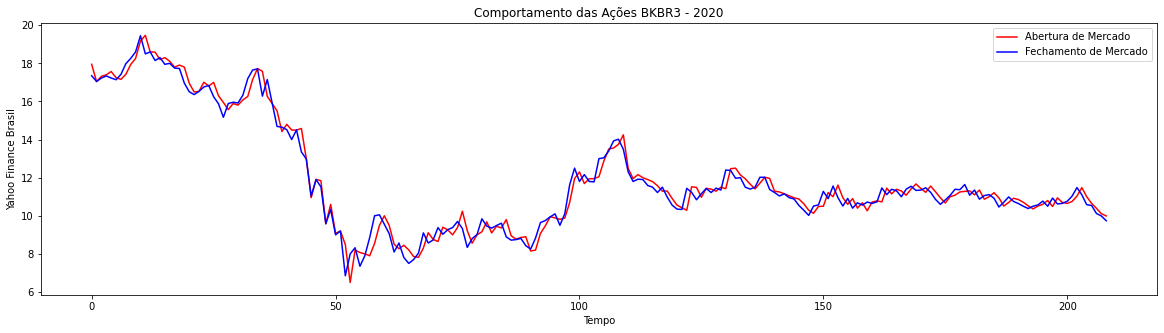

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(dataset_previsor['Open'], color = 'red', label = 'Abertura de Mercado')
plt.plot(dataset_previsor['Close'], color = 'blue', label = 'Fechamento de Mercado')
plt.title('Comportamento das Ações BKBR3 - 2020')
plt.xlabel('Tempo')
plt.ylabel('Yahoo Finance Brasil')
plt.legend()
plt.show()

In [36]:
treinamento = dataset_previsor.iloc[:, 1:2].values

In [42]:
normalizacao = MinMaxScaler(feature_range = (0,1))
treinamento_normalizado = normalizacao.fit_transform(treinamento)
treinamento_normalizado[0]

array([0.88280662])

In [43]:
treinamento_normalizado.shape

(208, 1)

In [64]:
preditores = []
preco_real = []

for i in range(100, treinamento_normalizado.shape[0]):
  preditores.append(treinamento_normalizado[i - 100: i, 0])
  preco_real.append(treinamento_normalizado[i, 0])

In [65]:
len(preditores)

108

In [66]:
len(preco_real)

108

In [68]:
preditores, preco_real = (np.array(preditores), np.array(preco_real))

In [69]:
preditores

array([[0.88280662, 0.8126447 , 0.83423291, ..., 0.32382423, 0.4202005 ,
        0.44718585],
       [0.8126447 , 0.83423291, 0.84040099, ..., 0.4202005 , 0.44718585,
        0.40015423],
       [0.83423291, 0.84040099, 0.85350816, ..., 0.44718585, 0.40015423,
        0.41942948],
       ...,
       [0.53970706, 0.54433312, 0.55898231, ..., 0.38396302, 0.34695454,
        0.31996918],
       [0.54433312, 0.55898231, 0.59753281, ..., 0.34695454, 0.31996918,
        0.29992292],
       [0.55898231, 0.59753281, 0.46106403, ..., 0.31996918, 0.29992292,
        0.27833464]])

In [70]:
preditores.shape

(108, 100)

In [71]:
preditores = np.reshape(preditores, (preditores.shape[0], preditores.shape[1], 1))
preditores.shape

(108, 100, 1)

In [73]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape = (preditores.shape[1], 1)))

model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units = 1, activation='linear'))

model.compile(optimizer = 'rmsprop', 
              loss = 'mean_squared_error',
              metrics = ['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 231,851
Trainable params: 231,851
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(preditores, preco_real, epochs=1000, batch_size= 32)